In [1]:
pip install numpy pandas scikit-learn


## Summary:

### Data Analysis Key Findings

* The process attempted to list image files in the specified Google Drive folder `/content/drive/MyDrive/train/images`.
* Subsequent steps to load, process, and organize images depend on the outcome of the image file listing.

### Insights or Next Steps

* Verify the path `/content/drive/MyDrive/train/images` is correct and contains image files with the specified extensions (.jpg, .jpeg, .png, .tiff, .bmp, .gif).
* Ensure the Google Drive is mounted correctly and accessible from the environment where the code is being run.
* If image files are found, proceed with loading, processing, and organizing the images.
* If no image files are found after verifying the path and mounting, investigate the contents of the folder.
* Once image data is successfully loaded and organized, the next step is to train a model using this data.

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00


In [3]:
pip install matplotlib seaborn


In [4]:
!pip install opencv-python rasterio geopandas folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 106.2 MB/s eta 0:00:00


In [5]:
pip install streamlit dash


ERROR: unknown command "install streamlit dash"


In [6]:
!apt-get install -y libspatialindex-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (306 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

In [7]:
!pip install geopandas rasterio

In [8]:
pip install  albumentations


In [9]:
from ultralytics import YOLO

# --- Train using a pretrained model ---
print("Training with pretrained model...")
model_pretrained = YOLO('yolov8n-seg.pt')

results_pretrained = model_pretrained.train(
    data="/content/drive/MyDrive/data.yaml",
    epochs=40,
    imgsz=640,
    hsv_h=0.03,
    hsv_s=0.6,
    hsv_v=0.5,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.2
)

# Extract and display metrics for pretrained model
print("\nMetrics for pretrained model:")
print(f"Precision (Box): {results_pretrained.box.p}")
print(f"Recall (Box): {results_pretrained.box.r}")
print(f"F1 Score (Box): {results_pretrained.box.f1}")
print(f"Precision (Mask): {results_pretrained.seg.p}")
print(f"Recall (Mask): {results_pretrained.seg.r}")
print(f"F1 Score (Mask): {results_pretrained.seg.f1}")


# --- Train from scratch ---
print("\nTraining from scratch...")
model_scratch = YOLO('yolov8n-seg.yaml') # Load model configuration

results_scratch = model_scratch.train(
    data="/content/drive/MyDrive/data.yaml",
    epochs=40,
    imgsz=640,
    hsv_h=0.03,
    hsv_s=0.6,
    hsv_v=0.5,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.2,
    pretrained=False # Explicitly set pretrained to False
)

# Extract and display metrics for training from scratch
print("\nMetrics for training from scratch:")
print(f"Precision (Box): {results_scratch.box.p}")
print(f"Recall (Box): {results_scratch.box.r}")
print(f"F1 Score (Box): {results_scratch.box.f1}")
print(f"Precision (Mask): {results_scratch.seg.p}")
print(f"Recall (Mask): {results_scratch.seg.r}")
print(f"F1 Score (Mask): {results_scratch.seg.f1}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Training with pretrained model...
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.6, hsv_v=0.5, img

RuntimeError: Dataset '/content/drive/MyDrive/data.yaml' error ❌ Dataset '/content/drive/MyDrive/data.yaml' images not found, missing path '/content/drive/MyDrive/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

The output shows the evaluation metrics after training, including:
* `box`: Object detection metrics (Precision, Recall, mAP50, mAP50-95)
* `mask`: Segmentation metrics (Precision, Recall, mAP50, mAP50-95)
These metrics provide an overview of the model's performance on the validation dataset.

In [11]:
from ultralytics import YOLO
import torch

# --- Clear GPU cache before training ---
torch.cuda.empty_cache()

# --- Train using a pretrained YOLOv11m detection model ---
print("Training with pretrained YOLOv11m detection model...")

# Load the pretrained YOLOv11 model
model_pretrained = YOLO('yolo11m.pt')  # Pretrained model on COCO dataset

# --- Start training ---
results_pretrained = model_pretrained.train(
    data="/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml",  # your dataset path
    epochs=40,
    imgsz=512,          # smaller image size to reduce memory usage
    batch=4,            # adjust for your GPU
    workers=2,          # fewer dataloader workers
    device=0,           # use GPU 0
    hsv_h=0.03,
    hsv_s=0.6,
    hsv_v=0.5,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.5,         # lighter augmentation for faster training
    mixup=0.1,
    copy_paste=0.0,
    pretrained=True     # ✅ enable pretrained weights
)

# # --- Display training metrics ---
# print("\n✅ Metrics for pretrained YOLOv11m detection model:")
# print(f"Precision (Box): {results_pretrained.box.p:.4f}")
# print(f"Recall (Box): {results_pretrained.box.r:.4f}")
# print(f"F1 Score (Box): {results_pretrained.box.f1:.4f}")


Training with pretrained YOLOv11m detection model...
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.6, hsv_v=0.5, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optim

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


 23        [16, 19, 22]  1   1414108  ultralytics.nn.modules.head.Detect           [4, [256, 512, 512]]          
YOLO11m summary: 231 layers, 20,056,092 parameters, 20,056,076 gradients, 68.2 GFLOPs

Transferred 643/649 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.3 ms, read: 22.7±7.5 MB/s, size: 59.8 KB)
train: Scanning /content/drive/MyDrive/Soil detection.v2i.yolov11/train/labels.cache... 199 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 199/199 270.0Kit/s 0.0s
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.8±1.6 ms, read: 15.1±11.2 MB/s, size: 64.9 KB)
val: Scanning /content/drive/MyDrive/Soil detection.v2i.yolov11/valid/labels.cache... 

KeyboardInterrupt: 

In [12]:
from ultralytics import YOLO
import torch

# --- Clear GPU cache before training ---
torch.cuda.empty_cache()

# --- Train using a pretrained YOLOv11m detection model ---
print("Training with pretrained YOLOv11m detection model...")

# Load the pretrained YOLOv11 model
model_pretrained = YOLO('yolo11m.pt')  # Pretrained model on COCO dataset

# --- Start training ---
results_pretrained = model_pretrained.train(
    data="/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml",  # your dataset path
    epochs=100,          # Increased epochs
    imgsz=512,          # smaller image size to reduce memory usage
    batch=4,            # adjust for your GPU
    workers=2,          # fewer dataloader workers
    device=0,           # use GPU 0
    hsv_h=0.03,
    hsv_s=0.7,          # Slightly increased saturation augmentation
    hsv_v=0.6,          # Slightly increased value augmentation
    degrees=15,         # Slightly increased degrees augmentation
    translate=0.15,     # Slightly increased translate augmentation
    scale=0.6,          # Slightly increased scale augmentation
    shear=3,            # Slightly increased shear augmentation
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.7,         # Increased mosaic augmentation
    mixup=0.2,          # Increased mixup augmentation
    copy_paste=0.0,
    pretrained=True     # ✅ enable pretrained weights
)

# # --- Display training metrics ---
# print("\n✅ Metrics for pretrained YOLOv11m detection model:")
# print(f"Precision (Box): {results_pretrained.box.p:.4f}")
# print(f"Recall (Box): {results_pretrained.box.r:.4f}")
# print(f"F1 Score (Box): {results_pretrained.box.f1:.4f}")

Training with pretrained YOLOv11m detection model...
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.7, hsv_v=0.6, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=0.7, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, opti

In [13]:
print(f"Number of classes: {model_pretrained.model.nc}")

Number of classes: 4


In [14]:
import numpy as np

print("\n✅ Metrics for pretrained YOLOv11m detection model (mean over classes):")
print(f"Precision (Box): {np.mean(results_pretrained.box.p):.4f}")
print(f"Recall (Box): {np.mean(results_pretrained.box.r):.4f}")
print(f"F1 Score (Box): {np.mean(results_pretrained.box.f1):.4f}")




✅ Metrics for pretrained YOLOv11m detection model (mean over classes):
Precision (Box): 0.4671
Recall (Box): 0.4950
F1 Score (Box): 0.4762


In [15]:
from ultralytics import YOLO
import torch

# --- Clear GPU cache before training ---
torch.cuda.empty_cache()

# --- Train using a pretrained YOLOv11m detection model ---
print("Training with soil-dependent model from scratch using YOLOv11m architecture...")

# Load the YOLOv11 model configuration
model_scratch = YOLO('yolo11m.yaml')  # Load model configuration

# --- Start training ---
results_scratch = model_scratch.train(
    data="/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml",  # your dataset path
    epochs=100,          # Increased epochs
    imgsz=512,          # smaller image size to reduce memory usage
    batch=4,            # adjust for your GPU
    workers=2,          # fewer dataloader workers
    device=0,           # use GPU 0
    hsv_h=0.03,
    hsv_s=0.7,          # Slightly increased saturation augmentation
    hsv_v=0.6,          # Slightly increased value augmentation
    degrees=15,         # Slightly increased degrees augmentation
    translate=0.15,     # Slightly increased translate augmentation
    scale=0.6,          # Slightly increased scale augmentation
    shear=3,            # Slightly increased shear augmentation
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.7,         # Increased mosaic augmentation
    mixup=0.2,          # Increased mixup augmentation
    copy_paste=0.0,
    pretrained=False     # Explicitly set pretrained to False for training from scratch
)

# # --- Display training metrics ---
# print("\n✅ Metrics for soil-dependent model training from scratch:")
# print(f"Precision (Box): {results_scratch.box.p:.4f}")
# print(f"Recall (Box): {results_scratch.box.r:.4f}")
# print(f"F1 Score (Box): {results_scratch.box.f1:.4f}")

Training with soil-dependent model from scratch using YOLOv11m architecture...
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Soil detection.v2i.yolov11/data.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.03, hsv_s=0.7, hsv_v=0.6, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11m.yaml, momentum=0.937, mosaic=0.7, multi_scale=False, name=train4, nbs=64, nms=False, opse

In [16]:
import numpy as np

# Print the number of classes
print(f"Number of classes: {model_scratch.model.nc}")

# Display training metrics (mean over classes)
print("\n✅ Metrics for soil-dependent model training from scratch (mean over classes):")
print(f"Precision (Box): {np.mean(results_scratch.box.p):.4f}")
print(f"Recall (Box): {np.mean(results_scratch.box.r):.4f}")
print(f"F1 Score (Box): {np.mean(results_scratch.box.f1):.4f}")

Number of classes: 4

✅ Metrics for soil-dependent model training from scratch (mean over classes):
Precision (Box): 0.3484
Recall (Box): 0.4985
F1 Score (Box): 0.4083


Number of classes: 4

image 1/1 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg: 512x512 1 Black Soil, 25.2ms
Speed: 2.2ms preprocess, 25.2ms inference, 7.4ms postprocess per image at shape (1, 3, 512, 512)


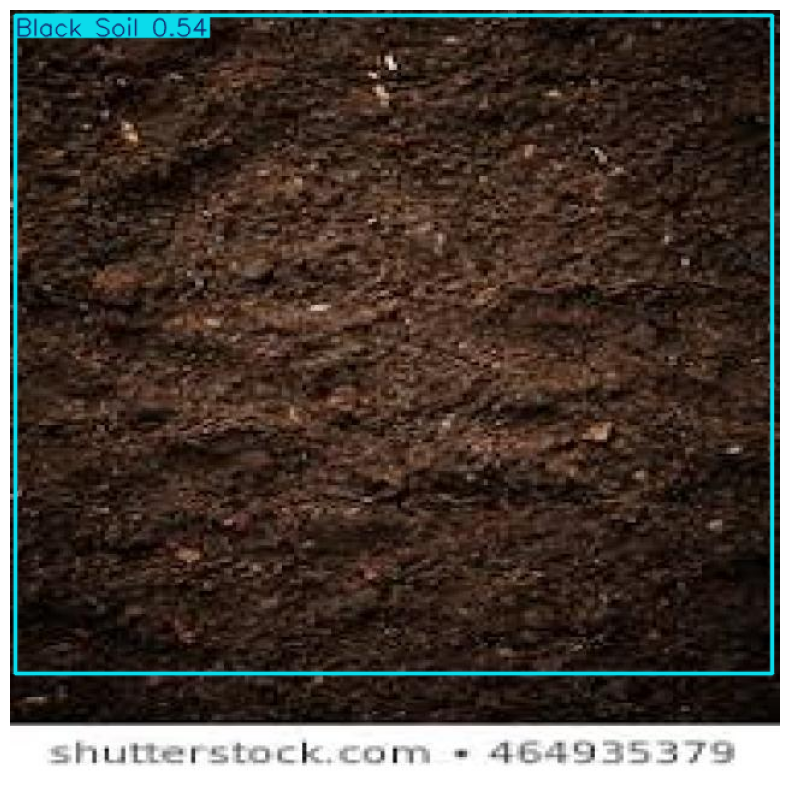

✅ Inference complete. Results displayed above.


In [19]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# --- Load the trained YOLOv11 pretrained model ---
trained_model_path = '/content/runs/detect/train4/weights/best.pt'  # your trained YOLOv11m model
if not os.path.exists(trained_model_path):
    raise FileNotFoundError(f"Trained model not found at {trained_model_path}")

model = YOLO(trained_model_path)

# --- Print the number of classes ---
print(f"Number of classes: {model.model.nc}")

# --- Path to the test image ---
test_image_path = '/content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg'
if not os.path.exists(test_image_path):
    raise FileNotFoundError(f"Test image not found at {test_image_path}")

# --- Run inference ---
results = model.predict(test_image_path, imgsz=512, conf=0.25)  # adjust image size & confidence

# --- Display results ---
for r in results:
    im_array = r.plot()  # Returns image with predictions
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB for matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

print("✅ Inference complete. Results displayed above.")